# MAJOR PROJECT
# TWITTER SENTIMENTAL ANALYSIS: ADANI
## GROUP MEMBERS: KARAN KAKADIYA AND KIRTI AGARWAL

# IMPORTING NECESSARY LIBRARIES

In [1]:
#Libraries 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import os

# Import functions for data preprocessing & data preparation
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer, LancasterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from nltk.corpus import wordnet
import string
from string import punctuation
import nltk
import re


# READING CSV FILE

In [2]:
df=pd.read_csv(r'D:\adypu\INTERSHIP\project\adani twitter\adani_tweets.csv')

# GETTING SUMMARY OF DATASET

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1002 non-null   int64 
 1   date        1002 non-null   object
 2   id          1002 non-null   int64 
 3   Tweets      1002 non-null   object
 4   likes       1002 non-null   int64 
 5   retweets    1002 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.1+ KB


In [4]:
# the Id and Unnamed: 0 columns not providing any important information to us..so we will better remove it
df=df.drop(['Unnamed: 0','id'],axis=1) 

In [5]:
df.describe()

,likes,retweets
count,1002.000000,1002.000000
mean,8.251497,1.962076
std,57.189998,12.707599
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,2.000000,0.000000
max,1217.000000,245.000000


# CLEANING THE DATASET

In [7]:
df.duplicated(subset='Tweets').sum()

1

In [8]:
# There is 1 Duplicated tweet in our Data..lets Remove it
df.drop_duplicates(subset='Tweets',inplace=True)

In [9]:
df.duplicated(subset='Tweets').sum()

0

In [10]:
# Converting Date column from object to datetime format
df['date']=pd.to_datetime(df['date'])

In [11]:
df.sort_values(by='likes',ascending=False).head(20)

,date,Tweets,likes,retweets
805,2023-02-02 03:58:07+00:00,Congress whip In Lok Sabha Mr @manickamtagore ...,1217,245
543,2023-02-03 08:25:33+00:00,That Hindenberg is in this to make money by sh...,939,138
126,2023-02-06 05:14:46+00:00,Mutual funds in india and elsewhere had very l...,476,132
93,2023-02-06 09:46:57+00:00,Hindenberg report is not an Hitjob on Indian e...,381,115
372,2023-02-04 06:16:09+00:00,"From this, I can tell you that all these joker...",369,66
707,2023-02-02 13:26:29+00:00,CONNECT THE DOTS: players in Bharath Jodo Yatr...,314,168
537,2023-02-03 09:30:00+00:00,#NLTippani: खबरिया चैनलों ने #HindenbergReport...,218,46
360,2023-02-04 07:07:33+00:00,"Did you know, Hindenberg Report is named after...",215,15
292,2023-02-04 15:16:37+00:00,✅Hindenberg Report Explained\n✅Adani response ...,213,31
688,2023-02-02 15:00:03+00:00,"#NLCharcha: ""चमत्कार दिखाने वाले ये क्यों नहीं...",177,34


# EDA

<AxesSubplot:>

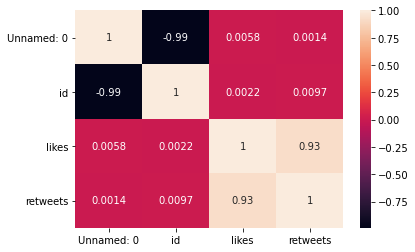

In [5]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='likes'>

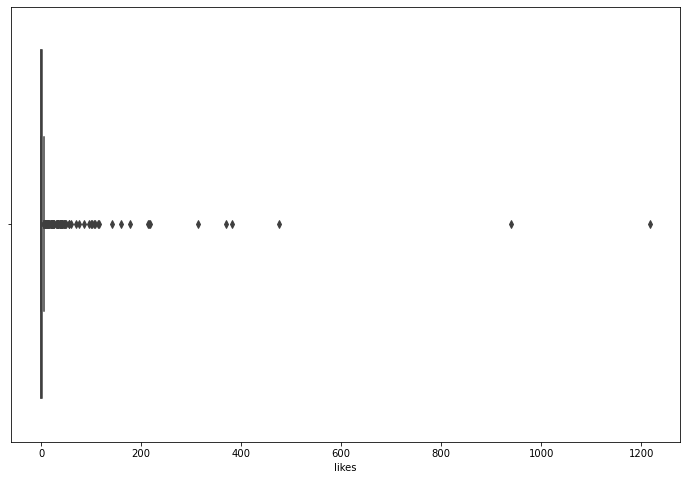

In [80]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df,x='likes')

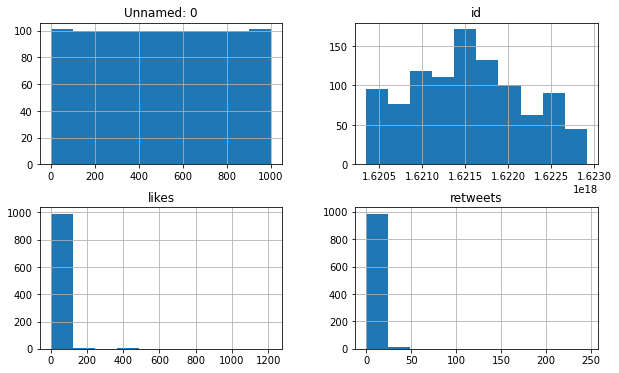

In [3]:
df.hist(figsize=(10,6));

C:\Users\RAKESH\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='likes', ylabel='Density'>

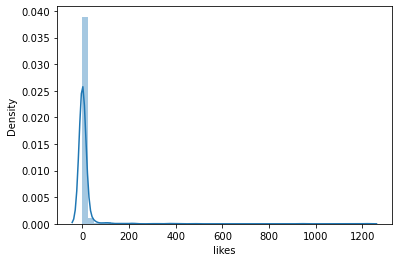

In [6]:
sns.distplot(df['likes'])

<AxesSubplot:xlabel='likes', ylabel='retweets'>

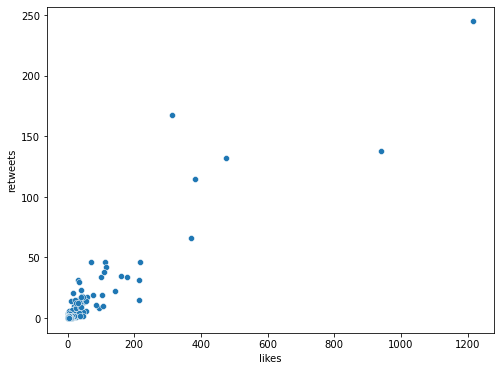

In [7]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='likes',y='retweets',data=df)

# TEXT PRE-PROCESSING

In [ ]:
#!pip install langdetect

In [11]:
# Removing all rows which having local languges used..we will only keeping those rows where English language present
from langdetect import detect

In [12]:
def keep_english(text):
    try:
        if detect(text) == 'en':
            return text
        else:
            return np.nan
    except:
        return np.nan

In [13]:
df['Tweets'].apply(keep_english).isnull().sum()

177

In [14]:
new_df=df['Tweets'].apply(keep_english)

In [15]:
new_df=pd.DataFrame({'Tweets':new_df})

In [16]:
li=new_df[new_df['Tweets'].isnull()].index.to_list()

In [17]:
# This are those tweets which are partially having local languges..so our model get confused if we did not filter that
pd.options.display.max_colwidth = 1000
Non_Eng=df.iloc[li].Tweets
Non_Eng.sample(15)

306                                                                                                                                                                                                                                                          पूंजीवाद का कंकड़\n\n#Adani \n\n#Hindenberg_Report https://t.co/zaIEGO7wxN
927                                                                                              @news24tvchannel @SudhanshuTrived Budget ko aitihaasik tabhi kaha jayega jab isme her bhartiya k nivesh kiye rs.k vapsi ki guarantee sarkar legi, hindenberg ki report se desh k logon men sarkar k prati avishvas ki lahar daur gai h
680                                                                                                                                                                                                                       @abaskswhy 53% wah wah hindenberg ki report jhooti hai lekin India today se jyada sccha to koi hai hi nhi 🤣🤣🤣
465             

In [18]:
new_df=new_df.dropna(subset=["Tweets"])

In [19]:
new_df.shape

(830, 1)

In [20]:
data1=new_df.copy()

# DATA TRANSFORMATION

In [21]:
# Making statement text in lower case
data1['new_tweets']=data1['Tweets'].str.lower()
data1['new_tweets'].tail()

996                                                                                                                                                                               @indiatoday @szarabi @jugeshinder any amount of clarifications won't satisfy  public at large as hindenberg report nailed it from top of the lid.
998                                                    he may soon lose his crown as asia's wealthiest person to longtime rival #mukeshambani, added #bloomberg \n\n#news #adanienterprises #ambani #gautamadani #billionaire #report #hindenbergresearch #hindenberg #hindenbergreport #economy #bloomberg https://t.co/f6zoc8qjif
999                                                                             to discredit india. remember the #barkhadutt pictures along with danish. they kicked a big row on the indian vaccines. as 2024 approaches we will face more attacks like the hindenberg report. thst company was investigated for fraud by the fbi.
1000                        

In [22]:
# Defining set containing all stopwords in English
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [23]:
# Cleaning and removing the above stop words list from the tweet text
pd.options.display.max_colwidth = 50
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stopwordlist])
data1['new_tweets'] = data1['new_tweets'].apply(lambda text: cleaning_stopwords(text))
data1['new_tweets'].head()

0    @hegade_u @jhasanjay let jha2 read carefully d...
1    @cursedse7en @memeghnad yes like rg bashed ada...
2    @_pallavighosh ji @rahulgandhi spoken hindenbe...
3    much venom spewed congress dynast adani group ...
4    hindenberg banned sec participating us markets...
Name: new_tweets, dtype: object

In [24]:
def clean_tweet(tweet):
    # Remove hashtags, mentions, and URLs
    tweet = re.sub(r'#\w+', '', tweet)
    tweet = re.sub(r'@\w+', '', tweet)
    tweet = re.sub(r'https?://\S+', '', tweet)
    
    # Remove extra spaces
    tweet = re.sub(' +', ' ', tweet).strip()
    
    return tweet

data1['new_tweets'] = data1['new_tweets'].apply(lambda x: clean_tweet(x))
data1['new_tweets'].tail()

996     amount clarifications won't satisfy public lar...
998     may soon lose crown asia's wealthiest person l...
999     discredit india. remember pictures along danis...
1000       pappus short stock believe hindenberg report😁😁
1001    people not read hindenberg report adani's resp...
Name: new_tweets, dtype: object

In [25]:
data1['new_tweets'].head()

0    let jha2 read carefully drafted " legal discla...
1    yes like rg bashed adani, modi also bash adani...
2        ji spoken hindenberg report well parliament 😂
3    much venom spewed congress dynast adani group ...
4    hindenberg banned sec participating us markets...
Name: new_tweets, dtype: object

In [26]:
#Clean emojis from text
def remove_emoji(tweet):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', tweet)
data1['new_tweets'] = data1['new_tweets'].apply(lambda text: remove_emoji(text))
data1['new_tweets'].head()

0    let jha2 read carefully drafted " legal discla...
1    yes like rg bashed adani, modi also bash adani...
2         ji spoken hindenberg report well parliament 
3    much venom spewed congress dynast adani group ...
4    hindenberg banned sec participating us markets...
Name: new_tweets, dtype: object

In [27]:
# Cleaning and removing punctuations
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
data1['new_tweets']= data1['new_tweets'].apply(lambda x: cleaning_punctuations(x))
data1['new_tweets'].tail()

996     amount clarifications wont satisfy public larg...
998     may soon lose crown asias wealthiest person lo...
999     discredit india remember pictures along danish...
1000         pappus short stock believe hindenberg report
1001    people not read hindenberg report adanis respo...
Name: new_tweets, dtype: object

In [28]:
# Cleaning and removing Numeric numbers
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
data1['new_tweets']= data1['new_tweets'].apply(lambda x: cleaning_numbers(x))
data1['new_tweets'].tail()

996     amount clarifications wont satisfy public larg...
998     may soon lose crown asias wealthiest person lo...
999     discredit india remember pictures along danish...
1000         pappus short stock believe hindenberg report
1001    people not read hindenberg report adanis respo...
Name: new_tweets, dtype: object

In [29]:
# Rechecking With Duuplicates
df1=data1.copy()
df1.head()
tweet_df= df1.drop_duplicates(subset='new_tweets')

In [30]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 811 entries, 0 to 1001
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Tweets      811 non-null    object
 1   new_tweets  811 non-null    object
dtypes: object(2)
memory usage: 19.0+ KB


# GETTING TOKENIZATION OF TWEET TEXT 

In [31]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [32]:
import re
def keep_only_text(x):
    tweet = re.sub(r'[^\x00-\x7F]+', '', x)
    return tweet
tweet_df['new_tweets']= tweet_df['new_tweets'].apply(lambda x: keep_only_text(x))
tweet_df['new_tweets'].head()

<ipython-input-32-b92469cf162d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_df['new_tweets']= tweet_df['new_tweets'].apply(lambda x: keep_only_text(x))


0    let jha read carefully drafted  legal disclaim...
1    yes like rg bashed adani modi also bash adani ...
2         ji spoken hindenberg report well parliament 
3    much venom spewed congress dynast adani group ...
4    hindenberg banned sec participating us markets...
Name: new_tweets, dtype: object

In [33]:
def tokenize(x):
    tokens = word_tokenize(x)
    return tokens
tweet_df['new_tweets']= tweet_df['new_tweets'].apply(lambda x: tokenize(x))
tweet_df['new_tweets'].head()

<ipython-input-33-9c377a6ac527>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_df['new_tweets']= tweet_df['new_tweets'].apply(lambda x: tokenize(x))


0    [let, jha, read, carefully, drafted, legal, di...
1    [yes, like, rg, bashed, adani, modi, also, bas...
2    [ji, spoken, hindenberg, report, well, parliam...
3    [much, venom, spewed, congress, dynast, adani,...
4    [hindenberg, banned, sec, participating, us, m...
Name: new_tweets, dtype: object

# APPLYING STEMMING

In [34]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(x):
    text = [st.stem(word) for word in x]
    return text
tweet_df['new_tweets']= tweet_df['new_tweets'].apply(lambda x: stemming_on_text(x))
tweet_df['new_tweets'].head()

<ipython-input-34-7fa0d5b93f10>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_df['new_tweets']= tweet_df['new_tweets'].apply(lambda x: stemming_on_text(x))


0    [let, jha, read, care, draft, legal, disclaim,...
1    [ye, like, rg, bash, adani, modi, also, bash, ...
2    [ji, spoken, hindenberg, report, well, parliam...
3    [much, venom, spew, congress, dynast, adani, g...
4    [hindenberg, ban, sec, particip, us, market, a...
Name: new_tweets, dtype: object

# APPLYING LEMMATIZER

In [35]:
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Error loading omw-1.4: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [36]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatizer_on_text(x):
    text=" ".join(x)
    lemmatized_word = lemmatizer.lemmatize(text)
    return lemmatized_word
tweet_df['new_tweets']= tweet_df['new_tweets'].apply(lambda x: lemmatizer_on_text(x))
tweet_df['new_tweets'].head()

<ipython-input-36-68b1ecec28c7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_df['new_tweets']= tweet_df['new_tweets'].apply(lambda x: lemmatizer_on_text(x))


0    let jha read care draft legal disclaim hindenb...
1    ye like rg bash adani modi also bash adani for...
2          ji spoken hindenberg report well parliament
3    much venom spew congress dynast adani group pa...
4    hindenberg ban sec particip us market also tak...
Name: new_tweets, dtype: object

In [37]:
from textblob import TextBlob
pol = lambda x:TextBlob(x).sentiment.polarity
sub = lambda x:TextBlob(x).sentiment.subjectivity

tweet_df['polarity'] = tweet_df['new_tweets'].apply(pol)
tweet_df['subjectivity'] = tweet_df['new_tweets'].apply(sub)

tweet_df.head(5)

<ipython-input-37-c34d9e52a8dd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_df['polarity'] = tweet_df['new_tweets'].apply(pol)
<ipython-input-37-c34d9e52a8dd>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_df['subjectivity'] = tweet_df['new_tweets'].apply(sub)


,Tweets,new_tweets,polarity,subjectivity
0,@hegade_u @JhaSanjay Let this Jha2 read carefu...,let jha read care draft legal disclaim hindenb...,0.200000,0.200000
1,@CursedSe7en @Memeghnad Yes and like RG bashed...,ye like rg bash adani modi also bash adani for...,0.000000,0.000000
2,@_pallavighosh ji So @RahulGandhi has spoken o...,ji spoken hindenberg report well parliament,0.000000,0.000000
3,With so much venom being spewed by Congress dy...,much venom spew congress dynast adani group pa...,0.007273,0.407576
4,Hindenberg is banned by SEC from participating...,hindenberg ban sec particip us market also tak...,-0.100000,0.600000


In [38]:
def sentiment_analysis(text):
    sentiment = TextBlob(text).sentiment.polarity
    if sentiment >0 :
        return "Positive"
    else:
        return "Negative"
tweet_df['sentiments']= tweet_df['new_tweets'].apply(lambda text: sentiment_analysis(text))

<ipython-input-38-8ec2859f77ca>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_df['sentiments']= tweet_df['new_tweets'].apply(lambda text: sentiment_analysis(text))


In [132]:
tweet_df.sentiments.value_counts()

Negative    546
Positive    263
Name: sentiments, dtype: int64

# Plot a cloud of words for Positive and negative tweets

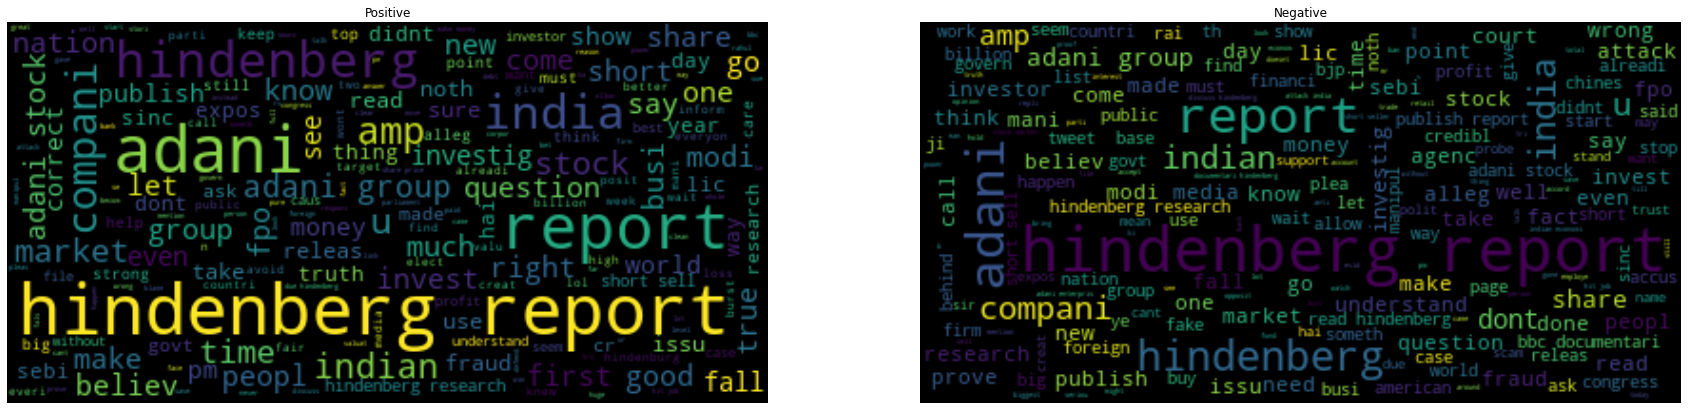

In [133]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Split the texts based on polarity
positive_texts = list(tweet_df[tweet_df.sentiments=='Positive']['new_tweets'])
negative_texts = list(tweet_df[tweet_df.sentiments=='Negative']['new_tweets'])


# Join the texts into a single string for each sentiment
positive_text = " ".join(positive_texts)
negative_text = " ".join(negative_texts)


# Generate word clouds for each sentiment
positive_wordcloud = WordCloud().generate(positive_text)
negative_wordcloud = WordCloud().generate(negative_text)


# Plot the word clouds
plt.figure(figsize=(30, 30))
plt.subplot(121)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Positive")

plt.subplot(122)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Negative")

plt.show()

Text(0.5, 1.0, 'Neutral')

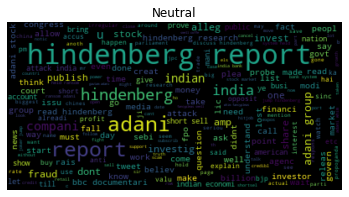

In [61]:
'''
neutral_texts = list(tweet_df[tweet_df.sentiments=='Neutral']['new_tweets'])
neutral_text = " ".join(neutral_texts)
neutral_wordcloud = WordCloud().generate(neutral_text)
plt.subplot(111)
plt.imshow(neutral_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Neutral")'''

In [134]:
pd.options.display.max_colwidth = 1000
tweet_df[tweet_df.sentiments=='Positive']['Tweets']

0                                     @hegade_u @JhaSanjay Let this Jha2 read carefully drafted " legal disclaimer" by Hindenberg with selected words to keep their safety and to avoid their accountability,responsibility from the source of their information and their findings in their report .
3                  With so much venom being spewed by Congress dynast on Adani group in parliament it is clear who is behind Hindenberg report. Never in the history of Independent India has an  Industrialist been personally targeted in parliament. Congress party's scion has stooped to new low
6                                                    Adani group faces the severe losses of $100 BILLION since hindenberg report, but different business experts, analyst, coaches came into the front foot and exposed the hindenberg report and said that ADANI group is very fundamentally strong.
7                              A very intersting point raised by @RahulGandhi. The #HindenbergReport talked about shel

In [135]:
tweet_df[tweet_df.sentiments=='Negative']['Tweets']

1                                                                                                                                            @CursedSe7en @Memeghnad Yes and like RG bashed Adani, Modi should also bash Adani? Forget, He should just say He would investigate the shell companies mentioned in Hindenberg report.
2                                                                                                                                                                                                                                @_pallavighosh ji So @RahulGandhi has spoken on Hindenberg Report as well that too in parliament 😂
4                                                                                                                                                                                                        Hindenberg is banned by SEC from participating in US markets and also from taking out any report on any US listed company.
5                           

# MODEL BUILDING

In [137]:
#Separating input feature and label
tweet_df['sentiments_num']= tweet_df.sentiments.replace({'Positive':1,'Negative':0})

<ipython-input-137-c299ffdb517d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_df['sentiments_num']= tweet_df.sentiments.replace({'Positive':1,'Negative':0})


In [138]:
tweet_df.head()

,Tweets,new_tweets,polarity,subjectivity,sentiments,sentiments_num
0,"@hegade_u @JhaSanjay Let this Jha2 read carefully drafted "" legal disclaimer"" by Hindenberg with selected words to keep their safety and to avoid their accountability,responsibility from the source of their information and their findings in their report .",let jha read care draft legal disclaim hindenberg select word keep safeti avoid accountabilityrespons sourc inform find report,0.200000,0.200000,Positive,1
1,"@CursedSe7en @Memeghnad Yes and like RG bashed Adani, Modi should also bash Adani? Forget, He should just say He would investigate the shell companies mentioned in Hindenberg report.",ye like rg bash adani modi also bash adani forget say would investig shell compani mention hindenberg report,0.000000,0.000000,Negative,0
2,@_pallavighosh ji So @RahulGandhi has spoken on Hindenberg Report as well that too in parliament 😂,ji spoken hindenberg report well parliament,0.000000,0.000000,Negative,0
3,With so much venom being spewed by Congress dynast on Adani group in parliament it is clear who is behind Hindenberg report. Never in the history of Independent India has an Industrialist been personally targeted in parliament. Congress party's scion has stooped to new low,much venom spew congress dynast adani group parliament clear behind hindenberg report never histori independ india industrialist person target parliament congress parti scion stoop new low,0.007273,0.407576,Positive,1
4,Hindenberg is banned by SEC from participating in US markets and also from taking out any report on any US listed company.,hindenberg ban sec particip us market also take report us list compani,-0.100000,0.600000,Negative,0


In [139]:
X=tweet_df.new_tweets
y=tweet_df.sentiments_num

# Splitting our data into Train and Test Subset

In [141]:
#Separating the 70% data for training data and 20% for testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state =42)

In [142]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
#for decision tree object
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

# Transforming Dataset using TF-IDF Vectorizer

In [143]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=10000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  10000


In [144]:
X_train = vectoriser.transform(X_train).toarray()
X_test  = vectoriser.transform(X_test).toarray()

In [145]:
X_train.shape

(647, 10000)

In [146]:
X_test.shape

(162, 10000)

In [147]:
# Cross verifying that we have got correct rows
X_train.shape[0] + X_test.shape[0] == X.shape[0]

True

In [148]:
def model_Evaluate(model):
# Predict values for Test dataset
    y_pred = model.predict(X_test)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))

    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(cf_matrix, cmap = 'Blues',fmt = '',annot=True)

# MODEL TRAINING

              precision    recall  f1-score   support

           0       0.66      1.00      0.80       106
           1       1.00      0.04      0.07        56

    accuracy                           0.67       162
   macro avg       0.83      0.52      0.43       162
weighted avg       0.78      0.67      0.55       162



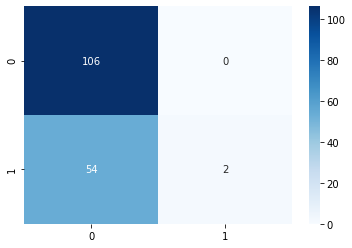

In [149]:
# Model-1
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

              precision    recall  f1-score   support

           0       0.73      0.94      0.82       106
           1       0.76      0.34      0.47        56

    accuracy                           0.73       162
   macro avg       0.74      0.64      0.65       162
weighted avg       0.74      0.73      0.70       162



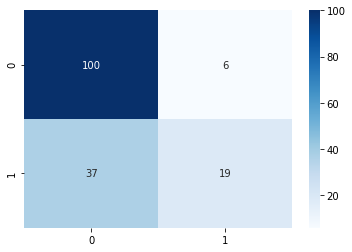

In [150]:
#model-2
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

              precision    recall  f1-score   support

           0       0.66      1.00      0.79       106
           1       1.00      0.02      0.04        56

    accuracy                           0.66       162
   macro avg       0.83      0.51      0.41       162
weighted avg       0.78      0.66      0.53       162



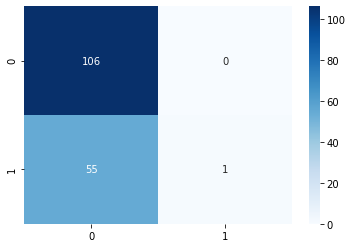

In [151]:
# model-3
LRmodel = LogisticRegression()
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

              precision    recall  f1-score   support

           0       0.69      0.96      0.80       106
           1       0.71      0.18      0.29        56

    accuracy                           0.69       162
   macro avg       0.70      0.57      0.54       162
weighted avg       0.70      0.69      0.62       162



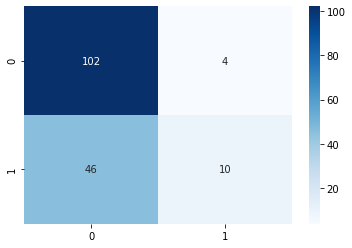

In [152]:
# model-4 
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
model_Evaluate(clf)
y_pred4 = clf.predict(X_test)

              precision    recall  f1-score   support

           0       0.66      1.00      0.79       106
           1       1.00      0.02      0.04        56

    accuracy                           0.66       162
   macro avg       0.83      0.51      0.41       162
weighted avg       0.78      0.66      0.53       162



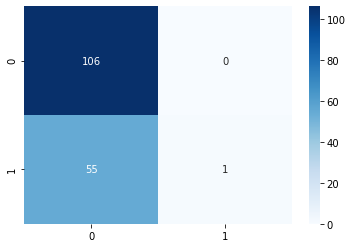

In [153]:
# model-5
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
MNBmodel = MultinomialNB()
MNBmodel.fit(X_train, y_train)
model_Evaluate(MNBmodel)
y_pred5 = BNBmodel.predict(X_test)

              precision    recall  f1-score   support

           0       0.65      0.67      0.66       106
           1       0.33      0.30      0.31        56

    accuracy                           0.54       162
   macro avg       0.49      0.49      0.49       162
weighted avg       0.54      0.54      0.54       162



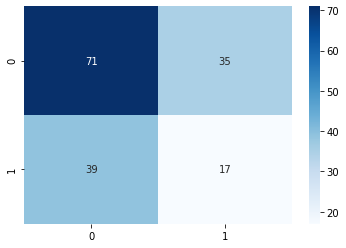

In [154]:
# model-6
GNBmodel = GaussianNB()
GNBmodel.fit(X_train, y_train)
model_Evaluate(GNBmodel)
y_pred6 = BNBmodel.predict(X_test)

              precision    recall  f1-score   support

           0       0.84      0.92      0.87       106
           1       0.80      0.66      0.73        56

    accuracy                           0.83       162
   macro avg       0.82      0.79      0.80       162
weighted avg       0.83      0.83      0.82       162



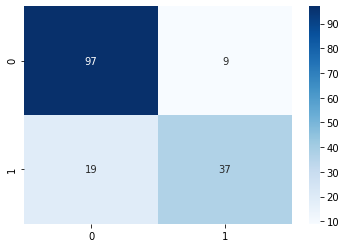

In [155]:
# model-7
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
model_Evaluate(dtree)
y_pred7 = dtree.predict(X_test)

# FINAL SENTIMENT PREDICTION

In [40]:
x=input("Enter your tweet")
sentiment = TextBlob(x).sentiment.polarity
#print(sentiment)
if sentiment >0:
    print( "Positive")
else:
    print("Negative")

Enter your tweetADANI IS RULING INDIA
Negative
